# Question 2

In [1]:
rm (list = ls())

In [2]:
#loading the bikeshare data 
library(ISLR2)
bikeshare_data <-Bikeshare
head(bikeshare_data)
dim(bikeshare_data)

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
6,1,Jan,1,5,0,6,0,cloudy/misty,0.24,0.2576,0.75,0.0896,0,1,1


[1] 8645   15

In [3]:
#checking for the null values
print(colSums(is.na(bikeshare_data)))

    season       mnth        day         hr    holiday    weekday workingday 
         0          0          0          0          0          0          0 
weathersit       temp      atemp        hum  windspeed     casual registered 
         0          0          0          0          0          0          0 
    bikers 
         0 


In [4]:
str(bikeshare_data)

'data.frame':	8645 obs. of  15 variables:
 $ season    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ mnth      : Factor w/ 12 levels "Jan","Feb","March",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : num  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: num  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: Factor w/ 4 levels "clear","cloudy/misty",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : num  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: num  13 32 27 10 1 1 0 2 7 6 ...
 $ bikers    : num  16 40 32 13 1 1 2 3 8 14 ...


In [5]:
#checking for the correlation with variables that numeric
corr <- cor(bikeshare_data[, -c(2,4,8)])
corr

,season,day,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,bikers
season,1.000000000,0.825218136,-0.0011158991,-0.013639174,0.013762919,0.343534543,0.35190989,0.19179327,-0.1547353480,0.14189429,0.220665728,0.221719405
day,0.825218136,1.000000000,0.0309717420,0.010989513,0.003277172,0.261315907,0.27309110,0.18945314,-0.1541691827,0.09098162,0.185043565,0.177796980
holiday,-0.001115899,0.030971742,1.0000000000,-0.076324217,-0.247933655,-0.020058662,-0.02691465,-0.02289525,0.0005018825,0.05290585,-0.046778809,-0.022911811
weekday,-0.013639174,0.010989513,-0.0763242171,1.000000000,0.018572083,-0.038968743,-0.04243861,-0.05130744,0.0395855477,-0.01347509,-0.000500069,-0.004320854
workingday,0.013762919,0.003277172,-0.2479336547,0.018572083,1.000000000,0.053405209,0.05255084,0.02530464,0.0105091219,-0.32475042,0.129539867,0.011704243
temp,0.343534543,0.261315907,-0.0200586618,-0.038968743,0.053405209,1.000000000,0.99202154,-0.03952480,-0.0059894439,0.47893076,0.381614376,0.451232536
atemp,0.351909887,0.273091098,-0.0269146531,-0.042438614,0.052550837,0.992021540,1.00000000,-0.02354086,-0.0461196382,0.47385896,0.378275354,0.447028543
hum,0.191793265,0.189453138,-0.0228952488,-0.051307436,0.025304636,-0.039524797,-0.02354086,1.00000000,-0.2631962300,-0.30709551,-0.243815262,-0.288615224
windspeed,-0.154735348,-0.154169183,0.0005018825,0.039585548,0.010509122,-0.005989444,-0.04611964,-0.26319623,1.0000000000,0.06611284,0.080873700,0.085355569
casual,0.141894291,0.090981622,0.0529058467,-0.013475086,-0.324750424,0.478930757,0.47385896,-0.30709551,0.0661128370,1.00000000,0.518815843,0.714741637


corrplot 0.92 loaded



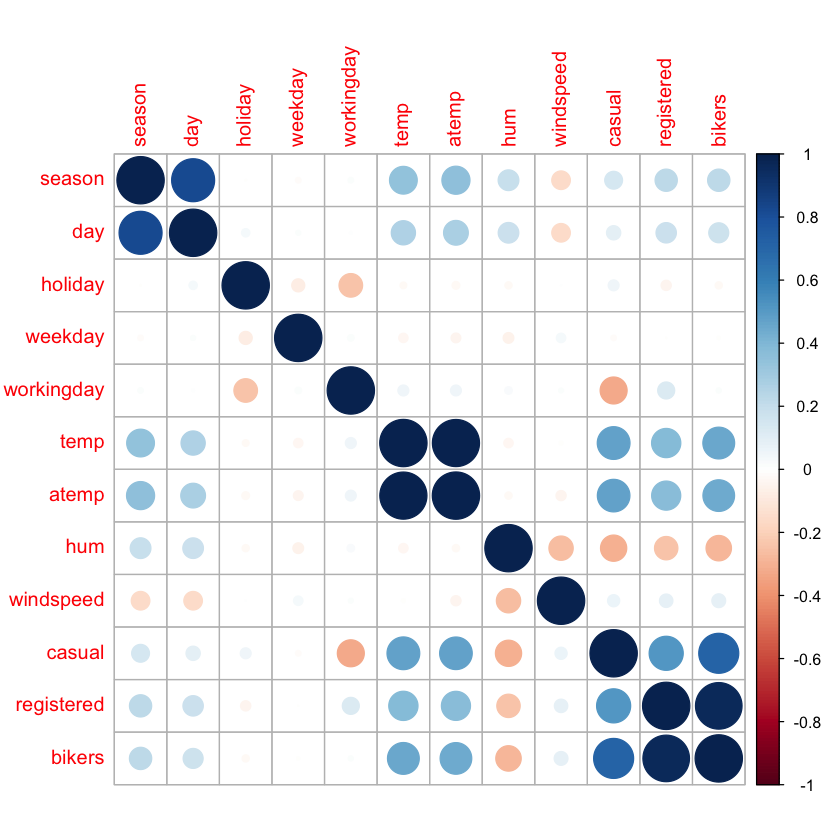

In [6]:
#plotting the correlation plot 
library(corrplot)
corrplot(corr, method = "circle" )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



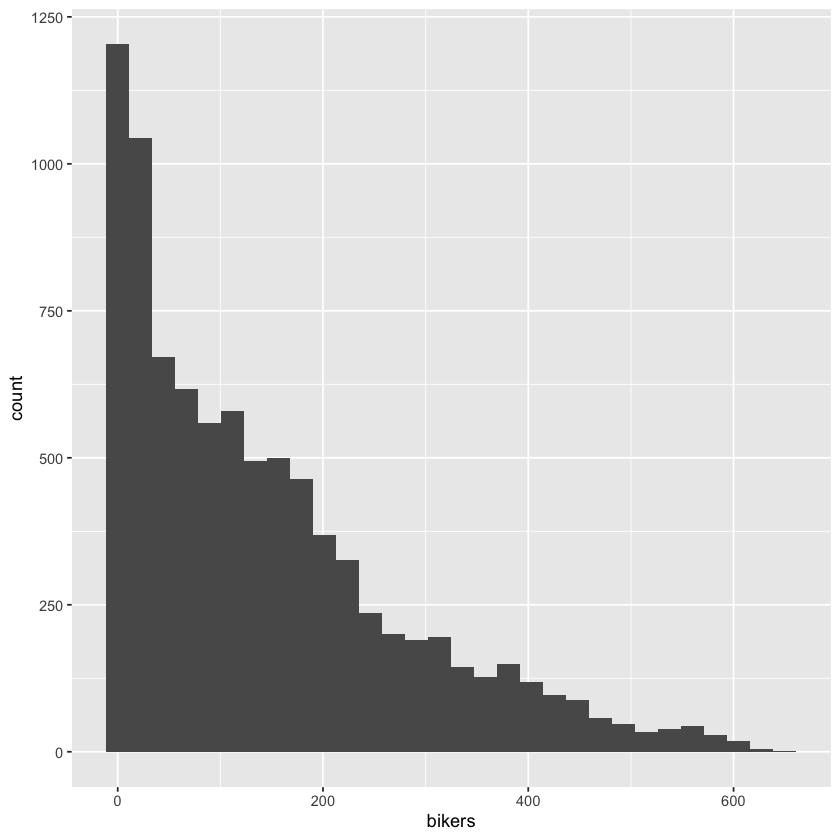

In [7]:
#plotting the histogram of the bikers column
library(ggplot2)
ggplot(bikeshare_data, aes(x = bikers)) + 
geom_histogram()

From the above,
* There are no nulls in the data.
* Also, Temp and Atemp columns are highly correlated.
* But, decision trees handle the problem of high collinearity.

2a) Divide the data into test and training and perform model selection to determine the optimal tree size. Comment on the performance of the tree. How many test samples are assigned to each terminal region?

In [8]:
#dropping day, casual, registered columns 
bikeshare_data <- bikeshare_data[, -c(3,13,14)]
dim(bikeshare_data)
head(bikeshare_data)

[1] 8645   12

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,bikers
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Jan,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,16
2,1,Jan,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,40
3,1,Jan,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,32
4,1,Jan,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,13
5,1,Jan,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,1
6,1,Jan,5,0,6,0,cloudy/misty,0.24,0.2576,0.75,0.0896,1


In [9]:
#converting categorical columns as factors 
bikeshare_data$season <- as.factor(bikeshare_data$season) 
bikeshare_data$holiday <- as.factor(bikeshare_data$holiday) 
bikeshare_data$weekday <- as.factor(bikeshare_data$weekday) 
bikeshare_data$workingday <- as.factor(bikeshare_data$workingday)

In [10]:
str(bikeshare_data)

'data.frame':	8645 obs. of  12 variables:
 $ season    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ mnth      : Factor w/ 12 levels "Jan","Feb","March",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weekday   : Factor w/ 7 levels "0","1","2","3",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ workingday: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weathersit: Factor w/ 4 levels "clear","cloudy/misty",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ bikers    : num  16 40 32 13 1 1 2 3 8 14 ...


In [11]:
#one-hot encoding for categorical variables
library(caret)
waste <- dummyVars(" ~ .", data = bikeshare_data)
df <- data.frame(predict(waste, newdata = bikeshare_data))
dim(df)
head(df)

Loading required package: lattice



[1] 8645   60

,season.1,season.2,season.3,season.4,mnth.Jan,mnth.Feb,mnth.March,mnth.April,mnth.May,mnth.June,⋯,workingday.1,weathersit.clear,weathersit.cloudy.misty,weathersit.light.rain.snow,weathersit.heavy.rain.snow,temp,atemp,hum,windspeed,bikers
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.24,0.2879,0.81,0.0000,16
2,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.22,0.2727,0.80,0.0000,40
3,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.22,0.2727,0.80,0.0000,32
4,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.24,0.2879,0.75,0.0000,13
5,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.24,0.2879,0.75,0.0000,1
6,1,0,0,0,1,0,0,0,0,0,⋯,0,0,1,0,0,0.24,0.2576,0.75,0.0896,1


In [12]:
#splitting the dataset in train and test
set.seed(88)
index <- sample(nrow(df), 0.7*nrow(df), replace= FALSE)
train <- df[index,]
test <- df[-index,]
dim(train)
head(train)
dim(test)
head(test)

[1] 6051   60

,season.1,season.2,season.3,season.4,mnth.Jan,mnth.Feb,mnth.March,mnth.April,mnth.May,mnth.June,⋯,workingday.1,weathersit.clear,weathersit.cloudy.misty,weathersit.light.rain.snow,weathersit.heavy.rain.snow,temp,atemp,hum,windspeed,bikers
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6733,0,0,0,1,0,0,0,0,0,0,⋯,1,0,1,0,0,0.54,0.5152,0.94,0.0000,4
2129,0,1,0,0,0,0,0,1,0,0,⋯,0,1,0,0,0,0.44,0.4394,0.33,0.2985,367
669,1,0,0,0,1,0,0,0,0,0,⋯,1,1,0,0,0,0.20,0.1970,0.59,0.2239,2
3229,0,1,0,0,0,0,0,0,1,0,⋯,1,0,1,0,0,0.54,0.5152,0.83,0.0000,130
3471,0,1,0,0,0,0,0,0,1,0,⋯,0,0,1,0,0,0.70,0.6667,0.74,0.2239,402
1353,1,0,0,0,0,0,1,0,0,0,⋯,1,1,0,0,0,0.34,0.3636,0.34,0.0000,64


[1] 2594   60

,season.1,season.2,season.3,season.4,mnth.Jan,mnth.Feb,mnth.March,mnth.April,mnth.May,mnth.June,⋯,workingday.1,weathersit.clear,weathersit.cloudy.misty,weathersit.light.rain.snow,weathersit.heavy.rain.snow,temp,atemp,hum,windspeed,bikers
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.22,0.2727,0.80,0.0000,40
11,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.38,0.3939,0.76,0.2537,36
13,1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0.42,0.4242,0.77,0.2836,84
16,1,0,0,0,1,0,0,0,0,0,⋯,0,0,1,0,0,0.44,0.4394,0.77,0.2985,110
25,1,0,0,0,1,0,0,0,0,0,⋯,0,0,1,0,0,0.46,0.4545,0.88,0.2985,17
30,1,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0.42,0.4242,0.77,0.2985,2


In [13]:
#install.packages("rpart")
#install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

In [14]:
#setting the model controls 
model.controls <- rpart.control(minbucket = 2, cp = 0.01, maxcompete = 3, maxsurrogate = 4, usesurrogate = 2, xval = 10, surrogatestyle = 0)

In [15]:
#building the regression tree
fit.bikeshare <- rpart(bikers ~., data = train, control = model.controls)

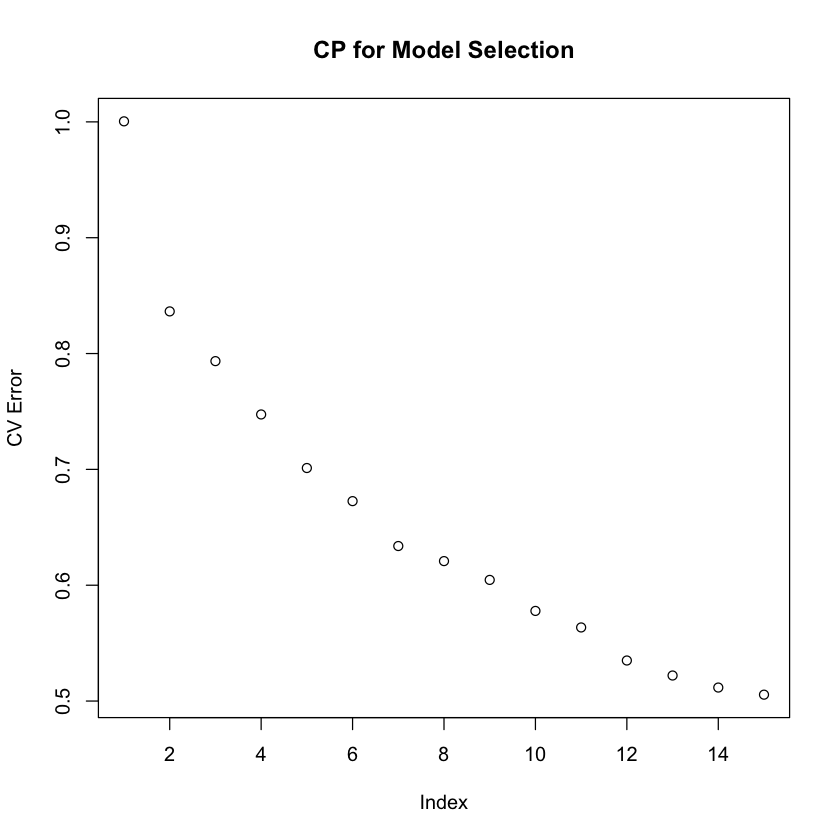

In [16]:
#plotting the error 
plot(fit.bikeshare$cptable[,4], main = 'CP for Model Selection', ylab = 'CV Error')


In [17]:
# building the pruned model based on min cp 

min_cp <- which.min(fit.bikeshare$cptable[,4])
pruned.bikeshare <- prune(fit.bikeshare, cp = fit.bikeshare$cp[min_cp, 1])


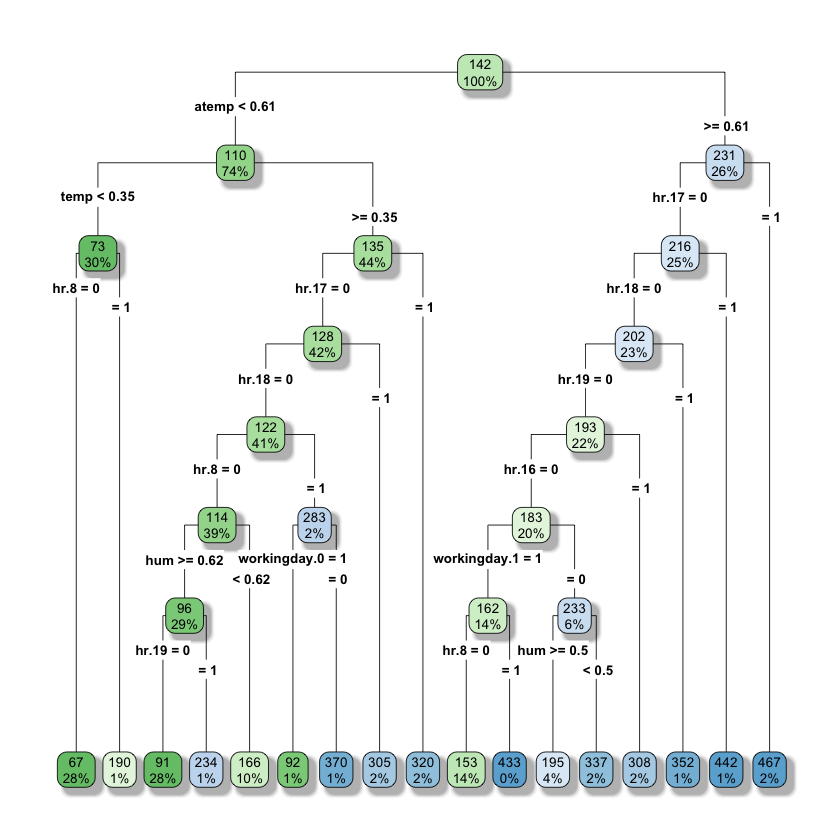

In [18]:
rpart.plot(pruned.bikeshare, box.palette="GnBu", type = 4, shadow.col="gray" ,roundint=TRUE)


In [19]:
#predictions for train and test data 
predict.train <- predict(pruned.bikeshare, newdata = train)
predict.test <- predict(pruned.bikeshare, newdata = test)

In [20]:
#errors for train and test data 
error.train <- (1/length(train$bikers))*((sum(predict.train - train$bikers))^2)
error.test <- (1/length(test$bikers))*((sum(predict.test - test$bikers))^2)

error.train
round(error.test, 2)

[1] 7.812609e-26

[1] 2478.89

* For the pruned regression tree, we can see that train error is almost equal to zero and test error is 2478.89 which means that this model is performing average.


In [23]:
frame_details <- pruned.bikeshare$frame
head(frame_details)

,var,n,wt,dev,yval,complexity,ncompete,nsurrogate
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,atemp,6051,6051,104433120,141.85126,0.164044438,3,4
2,temp,4456,4456,54038707,110.01706,0.040182557,3,4
4,hr.8,1805,1805,10367635,72.82659,0.011790685,3,0
8,<leaf>,1720,1720,7632918,67.02035,0.006895476,0,0
9,<leaf>,85,85,1503378,190.31765,0.007895928,0,0
5,hr.17,2651,2651,39474682,135.33912,0.032769116,3,0


In [26]:
#filtering the terminal nodes data
library(tidyverse)
terminal_nodes <- frame_details %>% filter(var != '<leaf>')
terminal_nodes 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()


var,n,wt,dev,yval,complexity,ncompete,nsurrogate
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
atemp,6051,6051,104433120,141.85126,0.16404444,3,4
temp,4456,4456,54038707,110.01706,0.04018256,3,4
hr.8,1805,1805,10367635,72.82659,0.01179068,3,0
hr.17,2651,2651,39474682,135.33912,0.03276912,3,0
hr.18,2554,2554,33602013,128.33712,0.02954378,3,0
hr.8,2459,2459,28794335,121.50549,0.02734969,3,0
hum,2354,2354,23349859,114.30756,0.02124163,3,4
hr.19,1733,1733,14392683,95.93133,0.01139165,3,0
workingday.0,105,105,2588261,282.87619,0.01682143,3,4


From the above, we can see the number of samples in each node before splitting at that particular terminal node.

2b) The board wants to identify good times to do “repair” and “tune-ups”. However, they want to minimize disruption of usage. You are asked to describe the “low yield” settings when the bikes are not being utilized (counts are low). Use your tree to advise on this matter.

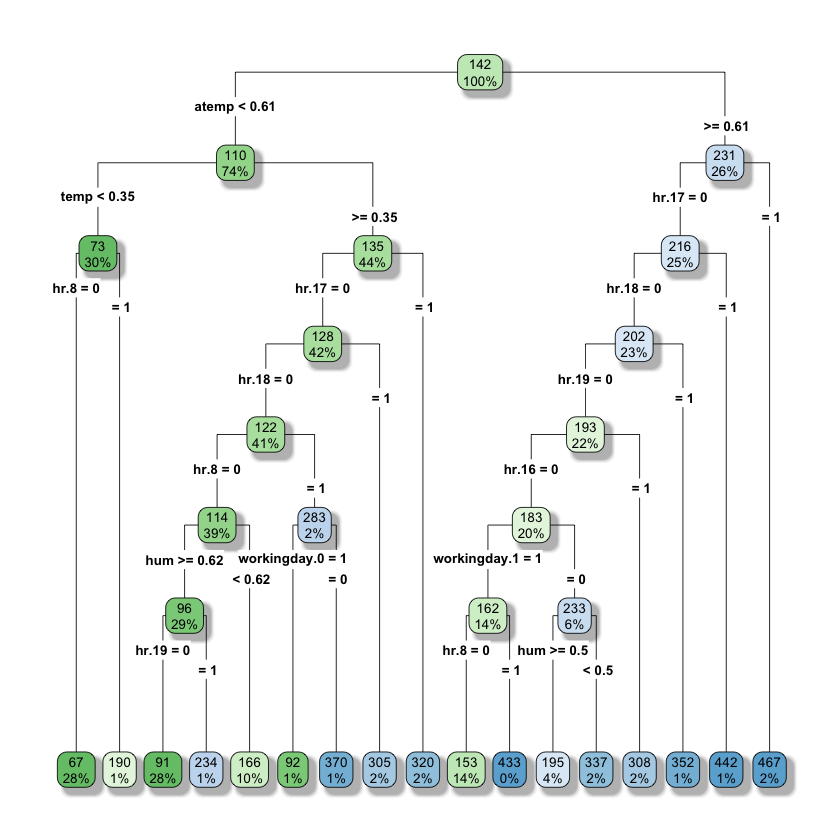

In [27]:
rpart.plot(pruned.bikeshare, box.palette="GnBu", type = 4, shadow.col="gray" ,roundint=TRUE)


* From the above plot, the best times for the bikes "repair" and "tuneups" can be in the following conditions.
* Mostly during low temperatures (atemp < 0.61)
 * a. During Morning hours.
 * b. If the temp > 0.35, during evening hours if it's not a working day.
 * c. If the temp > 0.35, during high humidites.
* If its a normal temperature range, most of the conditions have high usage in bikes and cannot be used this time for repairs.